## 第一步：数据处理

#### （1）数据读取
通过如下代码读入数据，了解下波士顿房价的数据集结构，数据存放在本地目录下housing.data文件中。 

In [2]:
import numpy as np
# 从文件里面把数据读取出来
data_file = "./dataset/housing.data"
data = np.fromfile(file=data_file, sep=" ")
data

array([6.320e-03, 1.800e+01, 2.310e+00, ..., 3.969e+02, 7.880e+00,
       1.190e+01])

#### （2）数据形状变换
由于读入的原始数据是1维的，所有数据都连在一起。因此需要我们将数据的形状进行变换，形成一个2维的矩阵，每行为一个数据样本（14个值），每个数据样本包含13个x（影响房价的特征）和一个 y（该类型房屋的均价）。

In [3]:
# 读入之后的数据被转化成1维array，其中array的第0-13项是第一条数据，第14-27项是第二条数据，以此类推.... 
# 这里对原始数据做reshape，变成N x 14的形式
feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
feature_num = len(feature_names) # 获取一行里面有多少个列，13+1=14
data = data.reshape([data.shape[0] // feature_num, feature_num]) # data.shape[0] // feature_num 得出行数，后面是列数
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

In [4]:
# 这里可以获取一条数据进行预览,验证一下里面的列数和数据是否正常
print(data[0].shape)
print(data[0])

(14,)
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]


### （3）数据集划分
将数据集划分成训练集和测试集，其中训练集用于确定模型的参数，测试集用于评判模型的效果。为什么要对数据集进行拆分，
在本案例中，我们将80%的数据用作训练集，20%用作测试集，实现代码如下。通过打印训练集的形状，可以发现共有404个样本，每个样本含有13个特征和1个预测值。

In [5]:
ratio = 0.8 # 拆分比例，80%的训练集，20%的测试集
print(data.shape[0]) #数据为506行
offset = int(data.shape[0] * ratio) # 然后乘以0.8 就是求出训练集的具体行数
training_data = data[:offset] # 然后分割训练数据集
training_data.shape

506


(404, 14)

### （4）数据归一化处理
对每个特征进行归一化处理，使得每个特征的取值缩放到0~1之间。这样做有两个好处：
- 一是模型训练更高效；
- 二是特征前的权重大小可以代表该变量对预测结果的贡献度（因为每个特征值本身的范围相同）。

In [6]:
# 计算train数据集的最大值，最小值
# axis=0 表示获取每一列的最大值 最小值
maximums, minimums = training_data.max(axis=0),training_data.min(axis=0)
print(len(minimums))  # 14个
# 对数据进行归一化处理
for i in range(feature_num):
    # 进行14次循环，然后对所有样本的每列进行统一归一化数据处理
    data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])
data

14


array([[0.00000000e+00, 1.80000000e-01, 7.34418420e-02, ...,
        1.00000000e+00, 8.96799117e-02, 4.22222222e-01],
       [2.35922539e-04, 0.00000000e+00, 2.62405717e-01, ...,
        1.00000000e+00, 2.04470199e-01, 3.68888889e-01],
       [2.35697744e-04, 0.00000000e+00, 2.62405717e-01, ...,
        9.87519166e-01, 6.34657837e-02, 6.60000000e-01],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.55339420e-01, ...,
        1.00000000e+00, 1.07891832e-01, 4.20000000e-01],
       [1.16072990e-03, 0.00000000e+00, 4.55339420e-01, ...,
        9.89420423e-01, 1.31070640e-01, 3.77777778e-01],
       [4.61841693e-04, 0.00000000e+00, 4.55339420e-01, ...,
        1.00000000e+00, 1.69701987e-01, 1.53333333e-01]])

### （5）封装成load data函数
将上面的步骤合并在一起，变成一个数据处理的函数

In [7]:
def load_data():
    # 从文件导入数据
    datafile = './dataset/housing.data'
    data = np.fromfile(datafile, sep=' ')

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)

    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算训练集的最大值，最小值
    maximums, minimums = training_data.max(axis=0), training_data.min(axis=0)

    # 对数据进行归一化处理
    for i in range(feature_num):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

In [8]:
training_data,test_data = load_data()
x = training_data[:,:-1] # 获取第一条的前面13个值
y = training_data[:,-1:] # 获取第一条的最后一个值
x, y

(array([[0.00000000e+00, 1.80000000e-01, 7.34418420e-02, ...,
         2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
        [2.35922539e-04, 0.00000000e+00, 2.62405717e-01, ...,
         5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
        [2.35697744e-04, 0.00000000e+00, 2.62405717e-01, ...,
         5.53191489e-01, 9.87519166e-01, 6.34657837e-02],
        ...,
        [1.59940420e-01, 0.00000000e+00, 7.00277888e-01, ...,
         8.08510638e-01, 1.00000000e+00, 5.12969095e-01],
        [1.07782432e-01, 0.00000000e+00, 7.00277888e-01, ...,
         8.08510638e-01, 9.36246550e-01, 5.12693157e-01],
        [2.78694093e-01, 0.00000000e+00, 7.00277888e-01, ...,
         8.08510638e-01, 1.00000000e+00, 4.97792494e-01]]),
 array([[0.42222222],
        [0.36888889],
        [0.66      ],
        [0.63111111],
        [0.69333333],
        [0.52666667],
        [0.39777778],
        [0.49111111],
        [0.25555556],
        [0.30888889],
        [0.22222222],
        [0.30888889],
 

## 第二步：模型设计
模型设计是深度学习模型关键要素之一，也称为网络结构设计，相当于模型的假设空间，即实现模型“前向计算”（从输入到输出）的过程。
如果将输入特征和输出预测值均以向量表示，输入特征x有13个向量，y有1个向量,shape=[1,13]那么参数权重的形状是[13,1]假设我们以如下任意数字赋值参数做初始化：

In [9]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, -0.1, -0.2, -0.3, -0.4, 0.0]
w = np.array(w).reshape([13, 1])
w

array([[ 0.1],
       [ 0.2],
       [ 0.3],
       [ 0.4],
       [ 0.5],
       [ 0.6],
       [ 0.7],
       [ 0.8],
       [-0.1],
       [-0.2],
       [-0.3],
       [-0.4],
       [ 0. ]])

取出第1条样本数据，观察样本的特征向量与参数向量相乘的结果。

In [10]:
x1 = x[0]
t = np.dot(x1, w) # 进行矩阵乘法计算
print(t)

[0.69474855]


写一个简单版本的网络类

In [11]:
class NetWork(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，
        # 此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1) # 随机生成一个权重W 然后形状是 [13,1]
        self.b = 0.  # b 偏置值
    
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    

基于Network类的定义，模型的计算过程如下所示。

In [12]:
net = NetWork(13)
x1 = x[0]
y1 = y[0]
z = net.forward(x1)
print(z)

# 计算损失函数
Loss = (y1 - z)*(y1 - z)
print(Loss)

[2.39362982]
[3.88644793]


## 第三步：训练配置
模型设计完成后，需要通过训练配置寻找模型的最优值，即通过损失函数来衡量模型的好坏。训练配置也是深度学习模型关键要素之一。

在Network类下面添加损失函数的代码实现如下：

In [13]:
class NetWork2(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        cost = error * error
        cost = np.mean(cost)
        return cost

In [14]:
net = NetWork2(13) # 向前计算获取预测值
# 此处可以一次性计算多个样本的预测值和损失函数
x1 = x[0:3] # 传三个样本值
y1 = y[0:3] # 获取前面三个真实值
z = net.forward(x1) # 传入三个样本，获取模型的预测值
print('predict: ', z)
loss = net.loss(z, y1) # 计算预测值和真实值之间的损失
print('loss:', loss)

predict:  [[2.39362982]
 [2.46752393]
 [2.02483479]]
loss: 3.384496992612791


## 第四步：训练过程
上述计算过程描述了如何构建神经网络，通过神经网络完成预测值和损失函数的计算。接下来介绍如何求解参数w和b的数值，这个过程也称为模型训练过程。训练过程是深度学习模型的关键要素之一，其目标是让定义的损失函数尽可能的小，也就是说找到一个参数解w和b，使得损失函数取得极小值。

### （1）梯度下降法

在现实中存在大量的函数正向求解容易，但反向求解较难，被称为单向函数，这种函数在密码学中有大量的应用。密码锁的特点是可以迅速判断一个密钥是否是正确的(已知x，求y很容易)，但是即使获取到密码锁系统，无法破解出正确的密钥是什么（已知y，求x很难）。神经网络模型的损失函数就是这样的单向函数，反向求解并不容易。

说人话：就是不断的调节权重w和偏执b的值，每次都向梯度最小的地方移动一点点

In [15]:
x1 = x[0] # 取一个样本
y1 = y[0] # 取真实值
z1 = net.forward(x1) # 获取预测值
print('x1 {}, shape {}'.format(x1, x1.shape))
print('y1 {}, shape {}'.format(y1, y1.shape))
print('z1 {}, shape {}'.format(z1, z1.shape))

x1 [0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991], shape (13,)
y1 [0.42222222], shape (1,)
z1 [2.39362982], shape (1,)


按上面的公式，当只有一个样本时，可以计算某个wj，比如w0的梯度。

In [16]:

gradient_w0 = (z1 - y1) * x1[0] # 与样本里面的第一个特征进行计算梯度
print(f'gradient_w0 {gradient_w0}')

gradient_w0 [0.]


同样我们可以计算w1的梯度。，也就是第二个特征值

In [17]:
gradient_w1 = (z1 - y1) * x1[1]
print('gradient_w1 {}'.format(gradient_w1))

gradient_w1 [0.35485337]


聪明的读者可能已经想到，写一个for循环即可计算从w0到w12的所有权重的梯度，该方法读者可以自行实现。

### （3）使用Numpy进行梯度计算
基于Numpy广播机制（对向量和矩阵计算如同对1个单一变量计算一样），可以更快速的实现梯度计算。得到的是一个13维的向量，每个分量分别代表该维度的梯度。

In [18]:
gradient_w = (z1 - y1) * x1
print('gradient_w_by_sample1 {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w_by_sample1 [0.         0.35485337 0.14478381 0.         0.62062832 1.13849828
 1.26486811 0.53070911 0.         0.44860841 0.56625537 1.9714076
 0.17679566], gradient.shape (13,)


输入数据中有多个样本，每个样本都对梯度有贡献。如上代码计算了只有样本1时的梯度值，同样的计算方法也可以计算样本2和样本3对梯度的贡献。

In [19]:
# 计算第二个样本里面的每一个特征值的梯度
x2 = x[1]
y2 = y[1]
z2 = net.forward(x2)
gradient_w = (z2 - y2) * x2
print('gradient_w_by_sample2 {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w_by_sample2 [4.95115308e-04 0.00000000e+00 5.50693832e-01 0.00000000e+00
 3.62727044e-01 1.15004718e+00 1.64259797e+00 7.32343840e-01
 9.12450018e-02 2.40970621e-01 1.16094704e+00 2.09863504e+00
 4.29108324e-01], gradient.shape (13,)


上面计算梯度，一个样本里面 利用numpy的广播机制 可以同时计算13个特征的梯度，那么有没有这么一种可能，其实样本也可以批量的进行计算


可能有的读者再次想到可以使用for循环把每个样本对梯度的贡献都计算出来，然后再作平均。但是我们不需要这么做，仍然可以使用Numpy的矩阵操作来简化运算，如3个样本的情况。

In [20]:
# 注意这里是一次取出3个样本的数据，不是取出第3个样本
x3samples = x[0:3] # 获取前三个样本
y3samples = y[0:3] # 获取前三个的真实值
z3samples = net.forward(x3samples)

print('x {}, shape {}'.format(x3samples, x3samples.shape))
print('y {}, shape {}'.format(y3samples, y3samples.shape))
print('z {}, shape {}'.format(z3samples, z3samples.shape))

x [[0.00000000e+00 1.80000000e-01 7.34418420e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.27557411e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 9.87519166e-01
  6.34657837e-02]], shape (3, 13)
y [[0.42222222]
 [0.36888889]
 [0.66      ]], shape (3, 1)
z [[2.39362982]
 [2.46752393]
 [2.02483479]], shape (3, 1)


上面的x3samples, y3samples, z3samples的第一维大小均为3，表示有3个样本。下面计算这3个样本对梯度的贡献。

In [21]:

gradient_w = (z3samples - y3samples) * x3samples
print('gradient_w {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w [[0.00000000e+00 3.54853368e-01 1.44783806e-01 0.00000000e+00
  6.20628319e-01 1.13849828e+00 1.26486811e+00 5.30709115e-01
  0.00000000e+00 4.48608410e-01 5.66255375e-01 1.97140760e+00
  1.76795660e-01]
 [4.95115308e-04 0.00000000e+00 5.50693832e-01 0.00000000e+00
  3.62727044e-01 1.15004718e+00 1.64259797e+00 7.32343840e-01
  9.12450018e-02 2.40970621e-01 1.16094704e+00 2.09863504e+00
  4.29108324e-01]
 [3.21688482e-04 0.00000000e+00 3.58140452e-01 0.00000000e+00
  2.35897372e-01 9.47722033e-01 8.18057517e-01 4.76275452e-01
  5.93406432e-02 1.56713807e-01 7.55014992e-01 1.34780052e+00
  8.66203097e-02]], gradient.shape (3, 13)


那么对于有N个样本的情形，我们可以直接使用如下方式计算出所有样本对梯度的贡献，这就是使用Numpy库广播功能带来的便捷。 小结一下这里使用Numpy库的广播功能：
一方面可以扩展参数的维度，代替for循环来计算1个样本对从w0到w12的所有参数的梯度。另一方面可以扩展样本的维度，代替for循环来计算样本0到样本403对参数的梯度。

In [22]:
z = net.forward(x)
gradient_w = (z - y) * x
print('gradient_w shape {}'.format(gradient_w.shape))
print(gradient_w)

gradient_w shape (404, 13)
[[0.00000000e+00 3.54853368e-01 1.44783806e-01 ... 5.66255375e-01
  1.97140760e+00 1.76795660e-01]
 [4.95115308e-04 0.00000000e+00 5.50693832e-01 ... 1.16094704e+00
  2.09863504e+00 4.29108324e-01]
 [3.21688482e-04 0.00000000e+00 3.58140452e-01 ... 7.55014992e-01
  1.34780052e+00 8.66203097e-02]
 ...
 [7.66711387e-01 0.00000000e+00 3.35694398e+00 ... 3.87578270e+00
  4.79373123e+00 2.45903597e+00]
 [4.83683601e-01 0.00000000e+00 3.14256160e+00 ... 3.62826605e+00
  4.20149273e+00 2.30075782e+00]
 [1.42480820e+00 0.00000000e+00 3.58013213e+00 ... 4.13346610e+00
  5.11244491e+00 2.54493671e+00]]


In [23]:

# axis = 0 表示把每一行做相加然后再除以总的行数
gradient_w = np.mean(gradient_w, axis=0)
print('gradient_w ', gradient_w.shape)
print('w ', net.w.shape)
print(gradient_w)
print(net.w)

gradient_w  (13,)
w  (13, 1)
[0.10197566 0.20327718 1.21762392 0.43059902 1.05326594 1.29064465
 1.95461901 0.5342187  0.88702053 1.15069786 1.5790441  2.43714929
 0.87116361]
[[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]]


In [24]:
z = net.forward(x)
gradient_w = (z - y) * x
gradient_w = np.mean(gradient_w, axis=0)
gradient_w = gradient_w[:, np.newaxis]
gradient_w

array([[0.10197566],
       [0.20327718],
       [1.21762392],
       [0.43059902],
       [1.05326594],
       [1.29064465],
       [1.95461901],
       [0.5342187 ],
       [0.88702053],
       [1.15069786],
       [1.5790441 ],
       [2.43714929],
       [0.87116361]])

上述代码非常简洁地完成了w的梯度计算。同样，计算b的梯度的代码也是类似的原理。

In [25]:
gradient_b = (z - y)
gradient_b = np.mean(gradient_b)
# 此处b是一个数值，所以可以直接用np.mean得到一个标量
gradient_b

2.599327274554706

将上面计算w和b的梯度的过程，写成Network类的gradient函数，实现方法如下所示。

In [26]:
class NetWork3(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        
        return gradient_w, gradient_b

In [27]:
# 调用上面定义的gradient函数，计算梯度
# 初始化网络
net = NetWork3(13)
# 设置[w5, w9] = [-100., -100.]
net.w[5] = -100.0
net.w[9] = -100.0

z = net.forward(x)
loss = net.loss(z, y)
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))


point [-100.0, -100.0], loss 7873.345739941161
gradient [-45.87968288123223, -35.50236884482904]


### （5）代码封装Train函数

In [28]:
class Network4(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights,1)
        self.w[5] = -100.
        self.w[9] = -100.
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)        
        return gradient_w, gradient_b
    
    def update(self, gradient_w5, gradient_w9, eta=0.01):
        net.w[5] = net.w[5] - eta * gradient_w5
        net.w[9] = net.w[9] - eta * gradient_w9
        
    def train(self, x, y, iterations=100, eta=0.01):
        points = []
        losses = []
        for i in range(iterations):
            points.append([net.w[5][0], net.w[9][0]])
            z = self.forward(x)
            L = self.loss(z, y)
            gradient_w, gradient_b = self.gradient(x, y)
            gradient_w5 = gradient_w[5][0]
            gradient_w9 = gradient_w[9][0]
            self.update(gradient_w5, gradient_w9, eta)
            losses.append(L)
            if i % 50 == 0:
                print('iter {}, point {}, loss {}'.format(i, [net.w[5][0], net.w[9][0]], L))
        return points, losses

iter 0, point [-99.54120317118768, -99.64497631155172], loss 7873.345739941161
iter 50, point [-78.9761810944732, -83.65939206734069], loss 5131.480704109405
iter 100, point [-62.4493631356931, -70.67918223434114], loss 3346.754494352463
iter 150, point [-49.17799206644332, -60.12620415441553], loss 2184.906016270654
iter 200, point [-38.53070194231174, -51.533984751788346], loss 1428.4172504483342
iter 250, point [-29.998249130283174, -44.52613603923428], loss 935.7392894242679
iter 300, point [-23.169901624519575, -38.79894318028118], loss 614.7592258739251
iter 350, point [-17.71439280083778, -34.10731848231335], loss 405.53408184471505
iter 400, point [-13.364557220746388, -30.253470630210863], loss 269.0551396220099
iter 450, point [-9.904936677384967, -27.077764259976597], loss 179.9364750604248
iter 500, point [-7.161782280775628, -24.451346444229817], loss 121.65711285489998
iter 550, point [-4.994989383373879, -22.270198517465555], loss 83.46491706360901
iter 600, point [-3.29

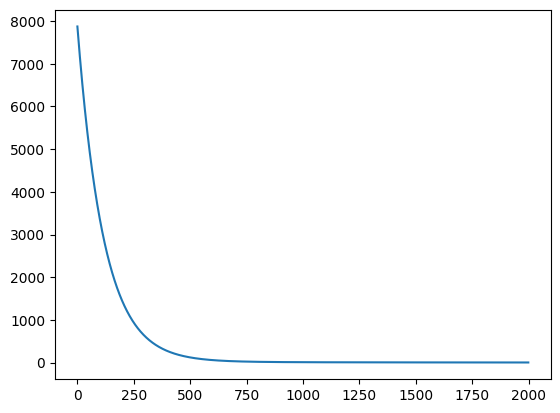

In [29]:
# 获取数据
train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]
# 创建网络
net = Network4(13)
num_iterations=2000
# 启动训练
points, losses = net.train(x, y, iterations=num_iterations, eta=0.01)

import matplotlib.pyplot as plt
# 画出损失函数的变化趋势
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

### （7）随机梯度下降法（ Stochastic Gradient Descent）
在上述程序中，每次损失函数和梯度计算都是基于数据集中的全量数据。对于波士顿房价预测任务数据集而言，样本数比较少，只有404个。但在实际问题中，数据集往往非常大，如果每次都使用全量数据进行计算，效率非常低，通俗地说就是“杀鸡焉用牛刀”。由于参数每次只沿着梯度反方向更新一点点，因此方向并不需要那么精确。一个合理的解决方案是每次从总的数据集中随机抽取出小部分数据来代表整体，基于这部分数据计算梯度和损失来更新参数，这种方法被称作随机梯度下降法（Stochastic Gradient Descent，SGD）

1）数据处理需要实现拆分数据批次和样本乱序（为了实现随机抽样的效果）两个功能。

In [30]:
# 获取数据
train_data, test_data = load_data()
train_data.shape

(404, 14)

train_data中一共包含404条数据，如果batch_size=10，即取前0-9号样本作为第一个minibatch，命名train_data1。

In [32]:
train_data1 = train_data[0:10] # 一个mini_batch 里面的batch_size=10
train_data1.shape # 打印它的形状

(10, 14)

使用train_data1的数据（0-9号样本）计算梯度并更新网络参数。

In [34]:
net = Network4(13)
x = train_data1[:, :-1] # 获取0-9号数据并且切割掉最后的真实标签值
y = train_data1[:, -1:] # 获取0-9号数据中的真实标签值
loss = net.train(x, y, iterations=1, eta=0.01) # iterations迭代几次等于就是epoch eta等于就是学习率
loss

iter 0, point [-99.60727070592526, -99.87969737392997], loss 4958.596073947111


([[-100.0, -100.0]], [4958.596073947111])

再取出10-19号样本作为第二个minibatch，计算梯度并更新网络参数。

In [35]:
train_data2 = train_data[10:20]
x = train_data2[:, :-1]
y = train_data2[:, -1:]
loss = net.train(x, y, iterations=1, eta=0.01)
loss

iter 0, point [-99.29902846494254, -99.70853875027915], loss 4589.18143734802


([[-99.60727070592526, -99.87969737392997]], [4589.18143734802])

In [36]:
batch_size = 10
n = len(train_data)
mini_batches = [train_data[k:k+batch_size] for k in range(0, n, batch_size)]
print('total number of mini_batches is ', len(mini_batches))
print('first mini_batch shape ', mini_batches[0].shape)
print('last mini_batch shape ', mini_batches[-1].shape)

total number of mini_batches is  41
first mini_batch shape  (10, 14)
last mini_batch shape  (4, 14)


打乱数据样例

In [37]:

# 新建一个array，使用shuffle函数可以用np里面的array的数据进行打乱
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
print('before shuffle', a)
np.random.shuffle(a)
print('after shuffle', a)

before shuffle [ 1  2  3  4  5  6  7  8  9 10 11 12]
after shuffle [ 7  2 11  3  8  6 12  1  4  5 10  9]


In [47]:
# 新建一个array，如果对矩阵进行shuffle，它是行进行重新排序
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
a = a.reshape([6, 2])
print('before shuffle\n', a)
np.random.shuffle(a)
print('after shuffle\n', a)

before shuffle
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
after shuffle
 [[ 3  4]
 [11 12]
 [ 1  2]
 [ 7  8]
 [ 9 10]
 [ 5  6]]


观察运行结果可发现，数组的元素在第0维被随机打乱，但第1维的顺序保持不变。例如数字2仍然紧挨在数字1的后面，数字8仍然紧挨在数字7的后面，而第二维的[3, 4]并不排在[1, 2]的后面。将这部分实现SGD算法的代码集成到Network类中的train函数中，最终的完整代码如下。

In [48]:
# 获取数据
train_data, test_data = load_data()
# 打乱样本顺序
np.random.shuffle(train_data)
# 将train_data分成多个minibatch
batch_size = 10
n = len(train_data)
mini_batches = [train_data[k:k+batch_size] for k in range(0, n, batch_size)]
# 创建网络
net = Network4(13)
# 依次使用每个mini_batch的数据
for mini_batch in mini_batches:
    x = mini_batch[:, :-1]
    y = mini_batch[:, -1:]
    loss = net.train(x, y, iterations=1)

iter 0, point [-99.5569344757609, -99.8020856033493], loss 6175.5704676755
iter 0, point [-99.16750034620405, -99.40818460350435], loss 7538.290665142724
iter 0, point [-98.77163561198597, -99.05017406120015], loss 7258.509948167596
iter 0, point [-98.37326235262877, -98.49684279616693], loss 9082.773015887276
iter 0, point [-97.96024882360804, -98.15483202819719], loss 7189.7625643456395
iter 0, point [-97.48200871697838, -97.64221508207], loss 9399.808148460037
iter 0, point [-97.04619346888111, -97.21823024129115], loss 8098.785322466781
iter 0, point [-96.61551013281019, -96.89469673362778], loss 7070.705847832025
iter 0, point [-96.17361075664186, -96.61979665687872], loss 6736.027341722399
iter 0, point [-95.64362849329908, -96.0733539544954], loss 10029.083850950195
iter 0, point [-95.21476953226198, -95.80737537422812], loss 6417.729055723061
iter 0, point [-94.874064116221, -95.52010390137723], loss 5781.679992414049
iter 0, point [-94.33163419440316, -94.96918582045656], loss

最终代码如下

Epoch   0 / iter   0, loss = 1.0281
Epoch   0 / iter   1, loss = 0.5048
Epoch   0 / iter   2, loss = 0.6382
Epoch   0 / iter   3, loss = 0.5168
Epoch   0 / iter   4, loss = 0.1951
Epoch   1 / iter   0, loss = 0.6281
Epoch   1 / iter   1, loss = 0.4611
Epoch   1 / iter   2, loss = 0.4520
Epoch   1 / iter   3, loss = 0.3961
Epoch   1 / iter   4, loss = 0.1381
Epoch   2 / iter   0, loss = 0.5642
Epoch   2 / iter   1, loss = 0.4250
Epoch   2 / iter   2, loss = 0.4480
Epoch   2 / iter   3, loss = 0.3881
Epoch   2 / iter   4, loss = 0.1884
Epoch   3 / iter   0, loss = 0.3921
Epoch   3 / iter   1, loss = 0.5582
Epoch   3 / iter   2, loss = 0.3759
Epoch   3 / iter   3, loss = 0.3849
Epoch   3 / iter   4, loss = 0.1425
Epoch   4 / iter   0, loss = 0.3821
Epoch   4 / iter   1, loss = 0.4382
Epoch   4 / iter   2, loss = 0.3864
Epoch   4 / iter   3, loss = 0.4314
Epoch   4 / iter   4, loss = 0.0471
Epoch   5 / iter   0, loss = 0.4264
Epoch   5 / iter   1, loss = 0.3829
Epoch   5 / iter   2, loss =

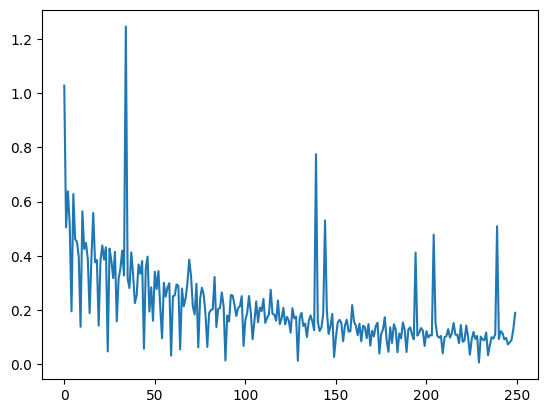

In [49]:
import numpy as np

class Network5(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        #np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        N = x.shape[0]
        gradient_w = 1. / N * np.sum((z-y) * x, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = 1. / N * np.sum(z-y)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
            
                
    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                #print(self.w.shape)
                #print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a = self.forward(x)
                loss = self.loss(a, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                                 format(epoch_id, iter_id, loss))
        
        return losses

# 获取数据
train_data, test_data = load_data()

# 创建网络
net = Network5(13)
# 启动训练
losses = net.train(train_data, num_epochs=50, batch_size=100, eta=0.1)

# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()